In [25]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)

1.13.1
2.2.4-tf


In [0]:
tf.enable_eager_execution()

 - CNN 입력 맵의 크기  
 CNN에서 왜 [n, height, width, channel]로 이미지 하나를 고쳐야 만 하는가?  
https://stackoverflow.com/questions/48509419/why-i-must-reshape-one-image-to-n-height-width-channel-in-cnn  
텐서로 변환할 때 이미지벡터를 batch size, width, height, channel의 수로 변환한다.  
tensorflow에서 tensor는 batch size라는 것을 사용할 수 있다.  
batch size는 GPU를 사용해서 동시에(병렬, parellel) 처리할 수 있는 데이터의 크기를 의미하는 것이다.  
그래서 batch를 이용해서 tensor를 처리하기 위해 batch를 첫번째 차원으로 넣어준다.  

- batch가 무엇인지, 어떻게 동작하는 지에 대한 내용은 아래 링크를 참조했다.  
https://stackoverflow.com/questions/41175401/what-is-a-batch-in-tensorflow  

- input  
[batch, in_height, in_width, in_channels]
- filter  
[filter_height, filter_width, in_channels, out_channels]




(1, 3, 3, 1)
(3, 3)
<class 'numpy.ndarray'>


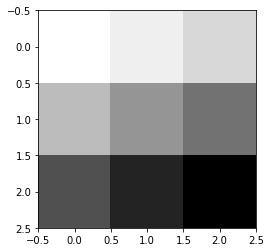

In [27]:
# (1,3,3,1) 의 텐서를 (3,3)크기의 numpy array로 변환했다.
# 텐서에서 각 차원의 의미가 무엇인지 다시 한번 확인해보자.
# numpy배열을 이용해서 그레이스케일의 그림을 그리고 있다.
image = tf.constant([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)

# reshape of tf constant
print(image.shape)
print(image.numpy().reshape(3,3).shape)
print(type(image.numpy().reshape(3,3)))

plt.imshow(image.numpy().reshape(3,3), cmap='Greys')
plt.show()

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 2, 2, 1)


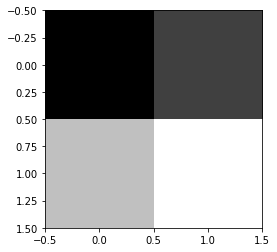

In [28]:
# 3x3의 입력 이미지에 대해 VALID 패딩을 하면 2x2 출력맵이 나온다(w,h: 3-2/1 + 1 = 2) 

#2x2크기의 필터(weight)를 만든다
print("image.shape", image.shape)
weight = np.array([[[[1.]],[[1.]]],
                   [[[1.]],[[1.]]]])

# initialize weight, layer. use 'VALID' padding
#weight을 init, padding 옵션을 VALID로 줘서 conv layer를 만든다.
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)

'''
image(1,3,3,1)을 conv layer로 만들었고 크기는 (1,3,3,1)이다.
batch, in_height, in_width, in_channels
'''
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='VALID',
                            kernel_initializer=weight_init)(image)

# reshape of keras layer 
# 출력을 거쳐서 나온 맵의 크기가 2x2로 작아진 것을 볼 수 있다.
print("conv2d.shape", conv2d.shape)
plt.imshow(conv2d.numpy().reshape(2,2), cmap='gray')
plt.show()

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


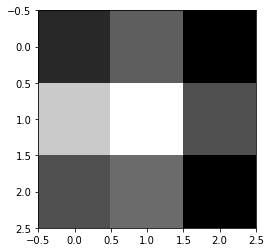

In [29]:
# Same 패딩을 하면 입력 맵의 크기와 같은 크기의 출력맵이 생성된다

#2x2크기의 필터(weight)를 만든다
print("image.shape", image.shape)
weight = np.array([[[[1.]],[[1.]]],
                   [[[1.]],[[1.]]]])

#weight을 init, padding 옵션을 SAME으로 줘서 conv layer를 만든다.
#weight numpy 배열을 tf constant로 초기화하면 (2,2,1,1)로 변경된다.(filter_height, filter_width, in_channels, out_channels)
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)

#image(1,3,3,1)을 conv layer로 만들었고 크기는 (1,3,3,1)이다.
#batch, in_height, in_width, in_channels
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='SAME',
                            kernel_initializer=weight_init)(image)

# reshape of keras layer 
# 출력을 거쳐서 나온 맵의 크기가 3x3으로 같은 크기로 보존된 것을 볼 수 있다.
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(3,3))
plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


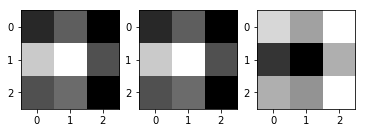

In [30]:
# 이번에는 여러개의 filter를 사용해보자

#weight filter의 크기는 2x2이다.
print("image.shape", image.shape)
weight = np.array([[[[1., 10., -1.]], [[1., 10., -1.]]],
                   [[[1., 10., -1.]], [[1., 10., -1.]]]])

# weigth 을 초기화
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)

'''
image(1,3,3,1)을 conv layer로 만들었고 크기는 (1,3,3,1)이다.
batch, in_height, in_width, in_channels
filters: filter의 갯수
kernel_size : filter의 w,h
padding: SAME/VALID(padding을 할것인지, SAME일 경우 padding)
'''
conv2d = keras.layers.Conv2D(filters=3, kernel_size=2, padding='SAME',
                             kernel_initializer=weight_init)(image)

# reshape of keras layer 
# 출력을 거쳐서 나온 맵의 크기가 3x3으로 같은 크기로 보존된 것을 볼 수 있다.
print("conv2d.shape", conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
  print(feature_map.reshape(3,3))
  plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(3,3), cmap='gray')
plt.show()

In [32]:
#2x2 크기의 np를 2x2크기의 필터로 pooling연산을 하면 4가 나오는 것을 볼 수 있다.
image = tf.constant([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='VALID')(image)
print(pool.shape)
print(pool.numpy())

(1, 1, 1, 1)
[[[[4.]]]]


## zero padding pooling



In [34]:
# pooling layer에도 padding을 적용할 수 있다
# 2,2크기의 입력배열의 가장자리에 0을 padding하여 3x3크기로 만들고 2x2 크기로 1씩 이동하며 pooling연산을 해서 출력은 2x2크기로 나오게 된다.
image = tf.constant([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='SAME')(image)
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]
